In [2]:
from decimal import Decimal, getcontext
import time
import matplotlib.pyplot as plt
from tabulate import tabulate
from math import factorial

def compute_pi_digit_bbp(n):
    getcontext().prec = n + 10
    pi = Decimal(0)
    for k in range(n):
        pi += (Decimal(1)/(16**k))*(
            (Decimal(4)/(8*k+1)) -
            (Decimal(2)/(8*k+4)) -
            (Decimal(1)/(8*k+5)) -
            (Decimal(1)/(8*k+6))
        )
    return int(pi * Decimal(10)**n) % 10

def compute_pi_digit_gauss_legendre(n):
    getcontext().prec = n + 10
    a = Decimal(1)
    b = 1 / Decimal(2).sqrt()
    t = Decimal(1) / Decimal(4)
    p = Decimal(1)
    for _ in range(n):
        a_next = (a + b) / 2
        b = (a * b).sqrt()
        t -= p * (a - a_next)**2
        a = a_next
        p *= 2
    pi = (a + b)**2 / (4 * t)
    return int(pi * Decimal(10)**n) % 10

def compute_pi_digit_ramanujan(n):
    getcontext().prec = n + 10
    pi = Decimal(0)
    for k in range(n):
        num = (factorial(4*k)*(1103+26390*k))
        den = (factorial(k)**4)*(396**(4*k))
        pi += Decimal(num) / Decimal(den)
    pi *= Decimal(2) * Decimal(2).sqrt() / Decimal(9801)
    return int(pi * Decimal(10)**n) % 10


In [8]:

def measure_execution_time(algorithm, n):
    start_time = time.time()
    algorithm(n)
    execution_time = time.time() - start_time
    return execution_time

def analyze_algorithms(digits):
    bbp_times = []
    gauss_legendre_times = []
    ramanujan_times = []

    for n in digits:
        bbp_time = measure_execution_time(compute_pi_digit_bbp, n)
        bbp_times.append(bbp_time)

        gauss_legendre_time = measure_execution_time(compute_pi_digit_gauss_legendre, n)
        gauss_legendre_times.append(gauss_legendre_time)

        ramanujan_time = measure_execution_time(compute_pi_digit_ramanujan, n)
        ramanujan_times.append(ramanujan_time)

    return bbp_times, gauss_legendre_times, ramanujan_times


digits = [10, 50, 100, 200, 500, 1000, 1500, 2000]
bbp_times, gauss_legendre_times, ramanujan_times = analyze_algorithms(digits)


+-------------------+----------------+---------------------------+----------------------+
|   nth digit of pi |   BBP Time (s) |   Gauss-Legendre Time (s) |   Ramanujan Time (s) |
+===================+================+===========================+======================+
|                10 |      0.0000000 |                 0.0000000 |            0.0000000 |
+-------------------+----------------+---------------------------+----------------------+
|                50 |      0.0000000 |                 0.0000000 |            0.0080049 |
+-------------------+----------------+---------------------------+----------------------+
|               100 |      0.0000000 |                 0.0000000 |            0.0319691 |
+-------------------+----------------+---------------------------+----------------------+
|               200 |      0.0079951 |                 0.0159883 |            0.3037992 |
+-------------------+----------------+---------------------------+----------------------+
|         

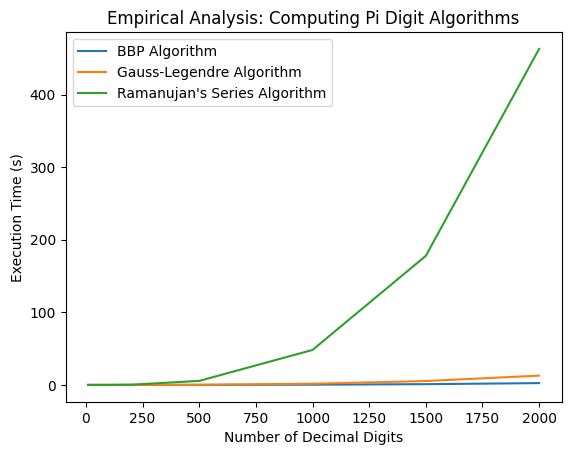

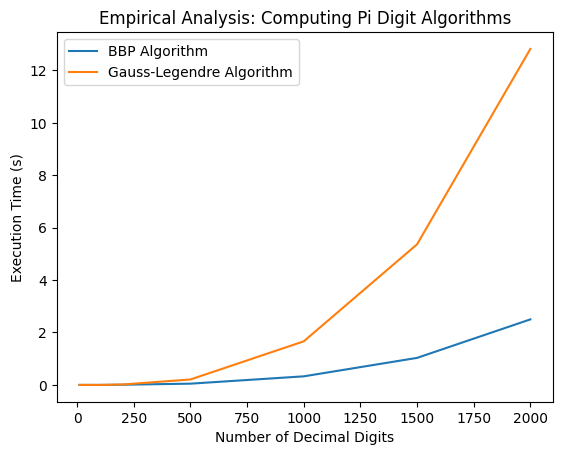

In [9]:

def plot_results(digits, bbp_times, gauss_legendre_times, ramanujan_times):
    plt.plot(digits, bbp_times, label='BBP Algorithm')
    plt.plot(digits, gauss_legendre_times, label='Gauss-Legendre Algorithm')
    plt.plot(digits, ramanujan_times, label="Ramanujan's Series Algorithm")
    plt.xlabel('Number of Decimal Digits')
    plt.ylabel('Execution Time (s)')
    plt.title('Empirical Analysis: Computing Pi Digit Algorithms')
    plt.legend()
    plt.show()

    plt.plot(digits, bbp_times, label='BBP Algorithm')
    plt.plot(digits, gauss_legendre_times, label='Gauss-Legendre Algorithm')
    plt.xlabel('Number of Decimal Digits')
    plt.ylabel('Execution Time (s)')
    plt.title('Empirical Analysis: Computing Pi Digit Algorithms')
    plt.legend()
    plt.show()

def display_results(digits, bbp_times, gauss_legendre_times, ramanujan_times):
    headers = ["nth digit of pi", "BBP Time (s)", "Gauss-Legendre Time (s)", "Ramanujan Time (s)"]
    data = zip(digits, bbp_times, gauss_legendre_times, ramanujan_times)
    table = tabulate(data, headers=headers, floatfmt=".7f", tablefmt="grid")
    print(table)

# Display results
display_results(digits, bbp_times, gauss_legendre_times, ramanujan_times)

# Plot results
plot_results(digits, bbp_times, gauss_legendre_times, ramanujan_times)
